In [1]:
# Importing python libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style = 'darkgrid')
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('../notebook/cleaned_donor_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   control_number               19372 non-null  int64  
 1   donated                      19372 non-null  int64  
 2   amount_donated               19372 non-null  float64
 3   months_since_origin          19372 non-null  int64  
 4   donor_age                    19372 non-null  int64  
 5   in_house                     19372 non-null  int64  
 6   urbanicity                   19372 non-null  int64  
 7   ses                          19372 non-null  int64  
 8   cluster_code                 19372 non-null  int64  
 9   home_owner                   19372 non-null  int64  
 10  donor_gender                 19372 non-null  int64  
 11  income_group                 19372 non-null  int64  
 12  published_phone              19372 non-null  int64  
 13  overlay_source  

In [4]:
df.head()

,control_number,donated,amount_donated,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,5,0,0.0,101,87,0,5,5,28,0,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,12,1,10.0,137,79,0,1,2,45,0,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,37,0,0.0,113,75,0,2,1,11,0,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,38,0,0.0,92,60,0,4,2,4,0,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,41,0,0.0,101,74,0,1,2,49,1,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [5]:
df.set_index('control_number', inplace = True)

# Data Modelling

## RandomForest Classifier

In [6]:
# Selecting the independent variables and the target variable
#
y = df['donated']
X = df.drop('donated', axis = 1)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4336
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      5812
   macro avg       1.00      1.00      1.00      5812
weighted avg       1.00      1.00      1.00      5812



array([[4336,    0],
       [   0, 1476]], dtype=int64)

## Feature Importance

In [7]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(rf.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
amount_donated,0.7886
median_home_value,0.0091
recent_response_prop,0.0081
per_capita_income,0.0080
median_household_income,0.0077
lifetime_avg_gift_amt,0.0075
file_avg_gift,0.0072
donor_age,0.0069
pct_attribute2,0.0068


### Visualising the most important features

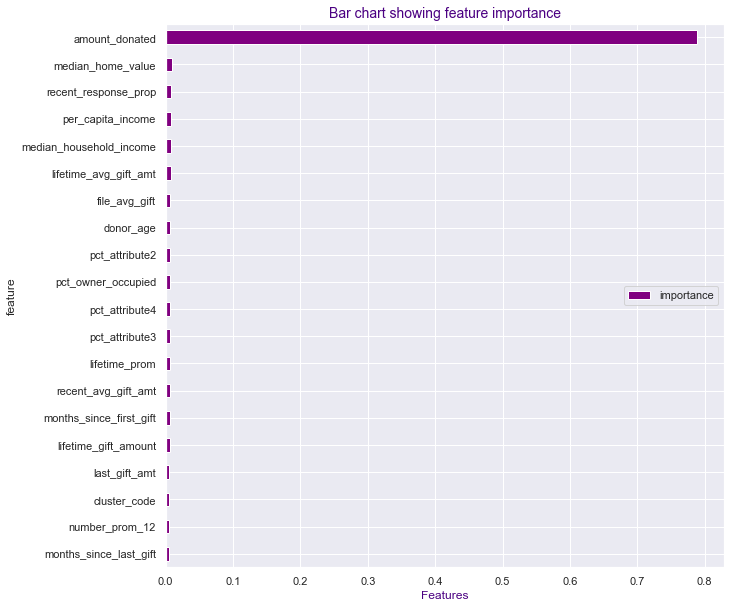

In [8]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:20].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

*From the above feature importance barchart, it can be observed that:*

*   The most important feature in predicting whether a person will donate or not is **amount donated**


### Remodelling with the most important features only

In [9]:
# Selecting only important features and the y variable
#

y = df['donated']
X = X[['pct_attribute3', 'pct_owner_occupied', 'pct_attribute4', 'pct_attribute2', 'donor_age',
        'file_avg_gift', 'lifetime_avg_gift_amt', 'median_household_income', 'per_capita_income', 'recent_response_prop', 'median_home_value', 'amount_donated']]

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4336
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      5812
   macro avg       1.00      1.00      1.00      5812
weighted avg       1.00      1.00      1.00      5812



array([[4336,    0],
       [   0, 1476]], dtype=int64)

*There is no  marginal decrease in f1 score*

### Parameter Tuning

In [10]:
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier()

In [11]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 3, 'n_estimators': 30}


In [12]:
# Applying the best parameters to the model
#
# Selecting only important features and the y variable
#
y = df['donated']
X = df[['pct_attribute3', 'pct_owner_occupied', 'pct_attribute4', 'pct_attribute2', 'donor_age',
        'file_avg_gift', 'lifetime_avg_gift_amt', 'median_household_income', 'per_capita_income', 'recent_response_prop', 'median_home_value', 'amount_donated']]

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=30, max_depth=3, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4336
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      5812
   macro avg       1.00      1.00      1.00      5812
weighted avg       1.00      1.00      1.00      5812



array([[4336,    0],
       [   0, 1476]], dtype=int64)

*Parameter tuning hasn't decreased or increased the f1 score*

### Cross Validation to check for the stability of the model

In [16]:
# Performing cross validation of ten folds
#
scores = cross_val_score(rf, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9997933882092542
Standard deviation of the cross validation scores is 0.0004132238571138669


*The true f1 score of the model is approximately 99%, with a variance of 0.000413.*

## AdaBoostClassifier

In [17]:
# Selecting the independent variables and the target variable
#
# Selecting the independent variables and the target variable
#
y = df['donated']
X = df.drop('donated', axis = 1)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4336
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      5812
   macro avg       1.00      1.00      1.00      5812
weighted avg       1.00      1.00      1.00      5812

The accuracy score is: 1.0 and the f1 score is 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4336
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      5812
   macro avg       1.00      1.00      1.00      5812
weighted avg       1.00      1.00      1.00      5812



array([[4336,    0],
       [   0, 1476]], dtype=int64)

In [18]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
amount_donated,1.0
months_since_origin,0.0
recent_response_prop,0.0
recent_avg_gift_amt,0.0
recent_card_response_prop,0.0
recent_avg_card_gift_amt,0.0
recent_response_count,0.0
recent_card_response_count,0.0
months_since_last_prom_resp,0.0
